In [2]:
import glob
import os
from readfiles import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
from lomapost import * #All functions defined within module lomapost
%matplotlib inline

In [3]:
set_fig_props()

In [4]:
from IPython.display import clear_output
from IPython.display import Image

In [5]:
p_run = '/data2/toni/work/results/Re160s10/case2/SS/h5.stats'

In [6]:
p_run_full = '/data2/toni/work/results/Re160s10/case2/h5.stats'

In [7]:
xlen=plt.rcParams['figure.figsize'][0]
xyratio=0.6
ylen = xyratio*xlen
#PRINT or not??
#PRINT = True
PRINT =False
l_job_color = ['k','b','g','r']
l_job_style = ['k-','b-','g-','r-']
save_folder='/home/toni/workshop/'
#fformat = '.png'
fformat = '.eps'

In [8]:
stats = {}
with h5py.File(p_run,"r") as f:
    lkeys = f.keys()
    for key in lkeys:
        stats[key] = np.array(f[key])
print lkeys

[u'EPS', u'R11', u'R12', u'R22', u'R33', u'Re', u'Relambda', u'Relambday', u'TT', u'Tm', u'Trms', u'XI', u'alp', u'bet', u'dm', u'dmpoint', u'dw', u'dyeta', u'epD', u'epNH', u'epR', u'epS', u'eta', u'etamin', u'k', u'llambda', u'mum', u'nacum', u'nu', u'rhoEPS', u'rhom', u'rum', u'rvm', u'rwm', u'time', u'um', u'urms', u'uv', u'vm', u'vrms', u'w1m', u'w1rms', u'w2m', u'w2rms', u'w3m', u'w3rms', u'wm', u'wrms', u'y']


In [9]:
statsf = {}
with h5py.File(p_run_full,"r") as f:
    lkeys = f.keys()
    for key in lkeys:
        statsf[key] = np.array(f[key])
print lkeys

[u'EPS', u'R11', u'R12', u'R22', u'R33', u'Re', u'Relambda', u'Relambday', u'TT', u'Tm', u'Trms', u'XI', u'alp', u'bet', u'dm', u'dmpoint', u'dw', u'dyeta', u'epD', u'epNH', u'epR', u'epS', u'eta', u'etamin', u'k', u'llambda', u'mum', u'nacum', u'nu', u'rhoEPS', u'rhom', u'rum', u'rvm', u'rwm', u'time', u'um', u'urms', u'uv', u'vm', u'vrms', u'w1m', u'w1rms', u'w2m', u'w2rms', u'w3m', u'w3rms', u'wm', u'wrms', u'y']


(0, 0.005)

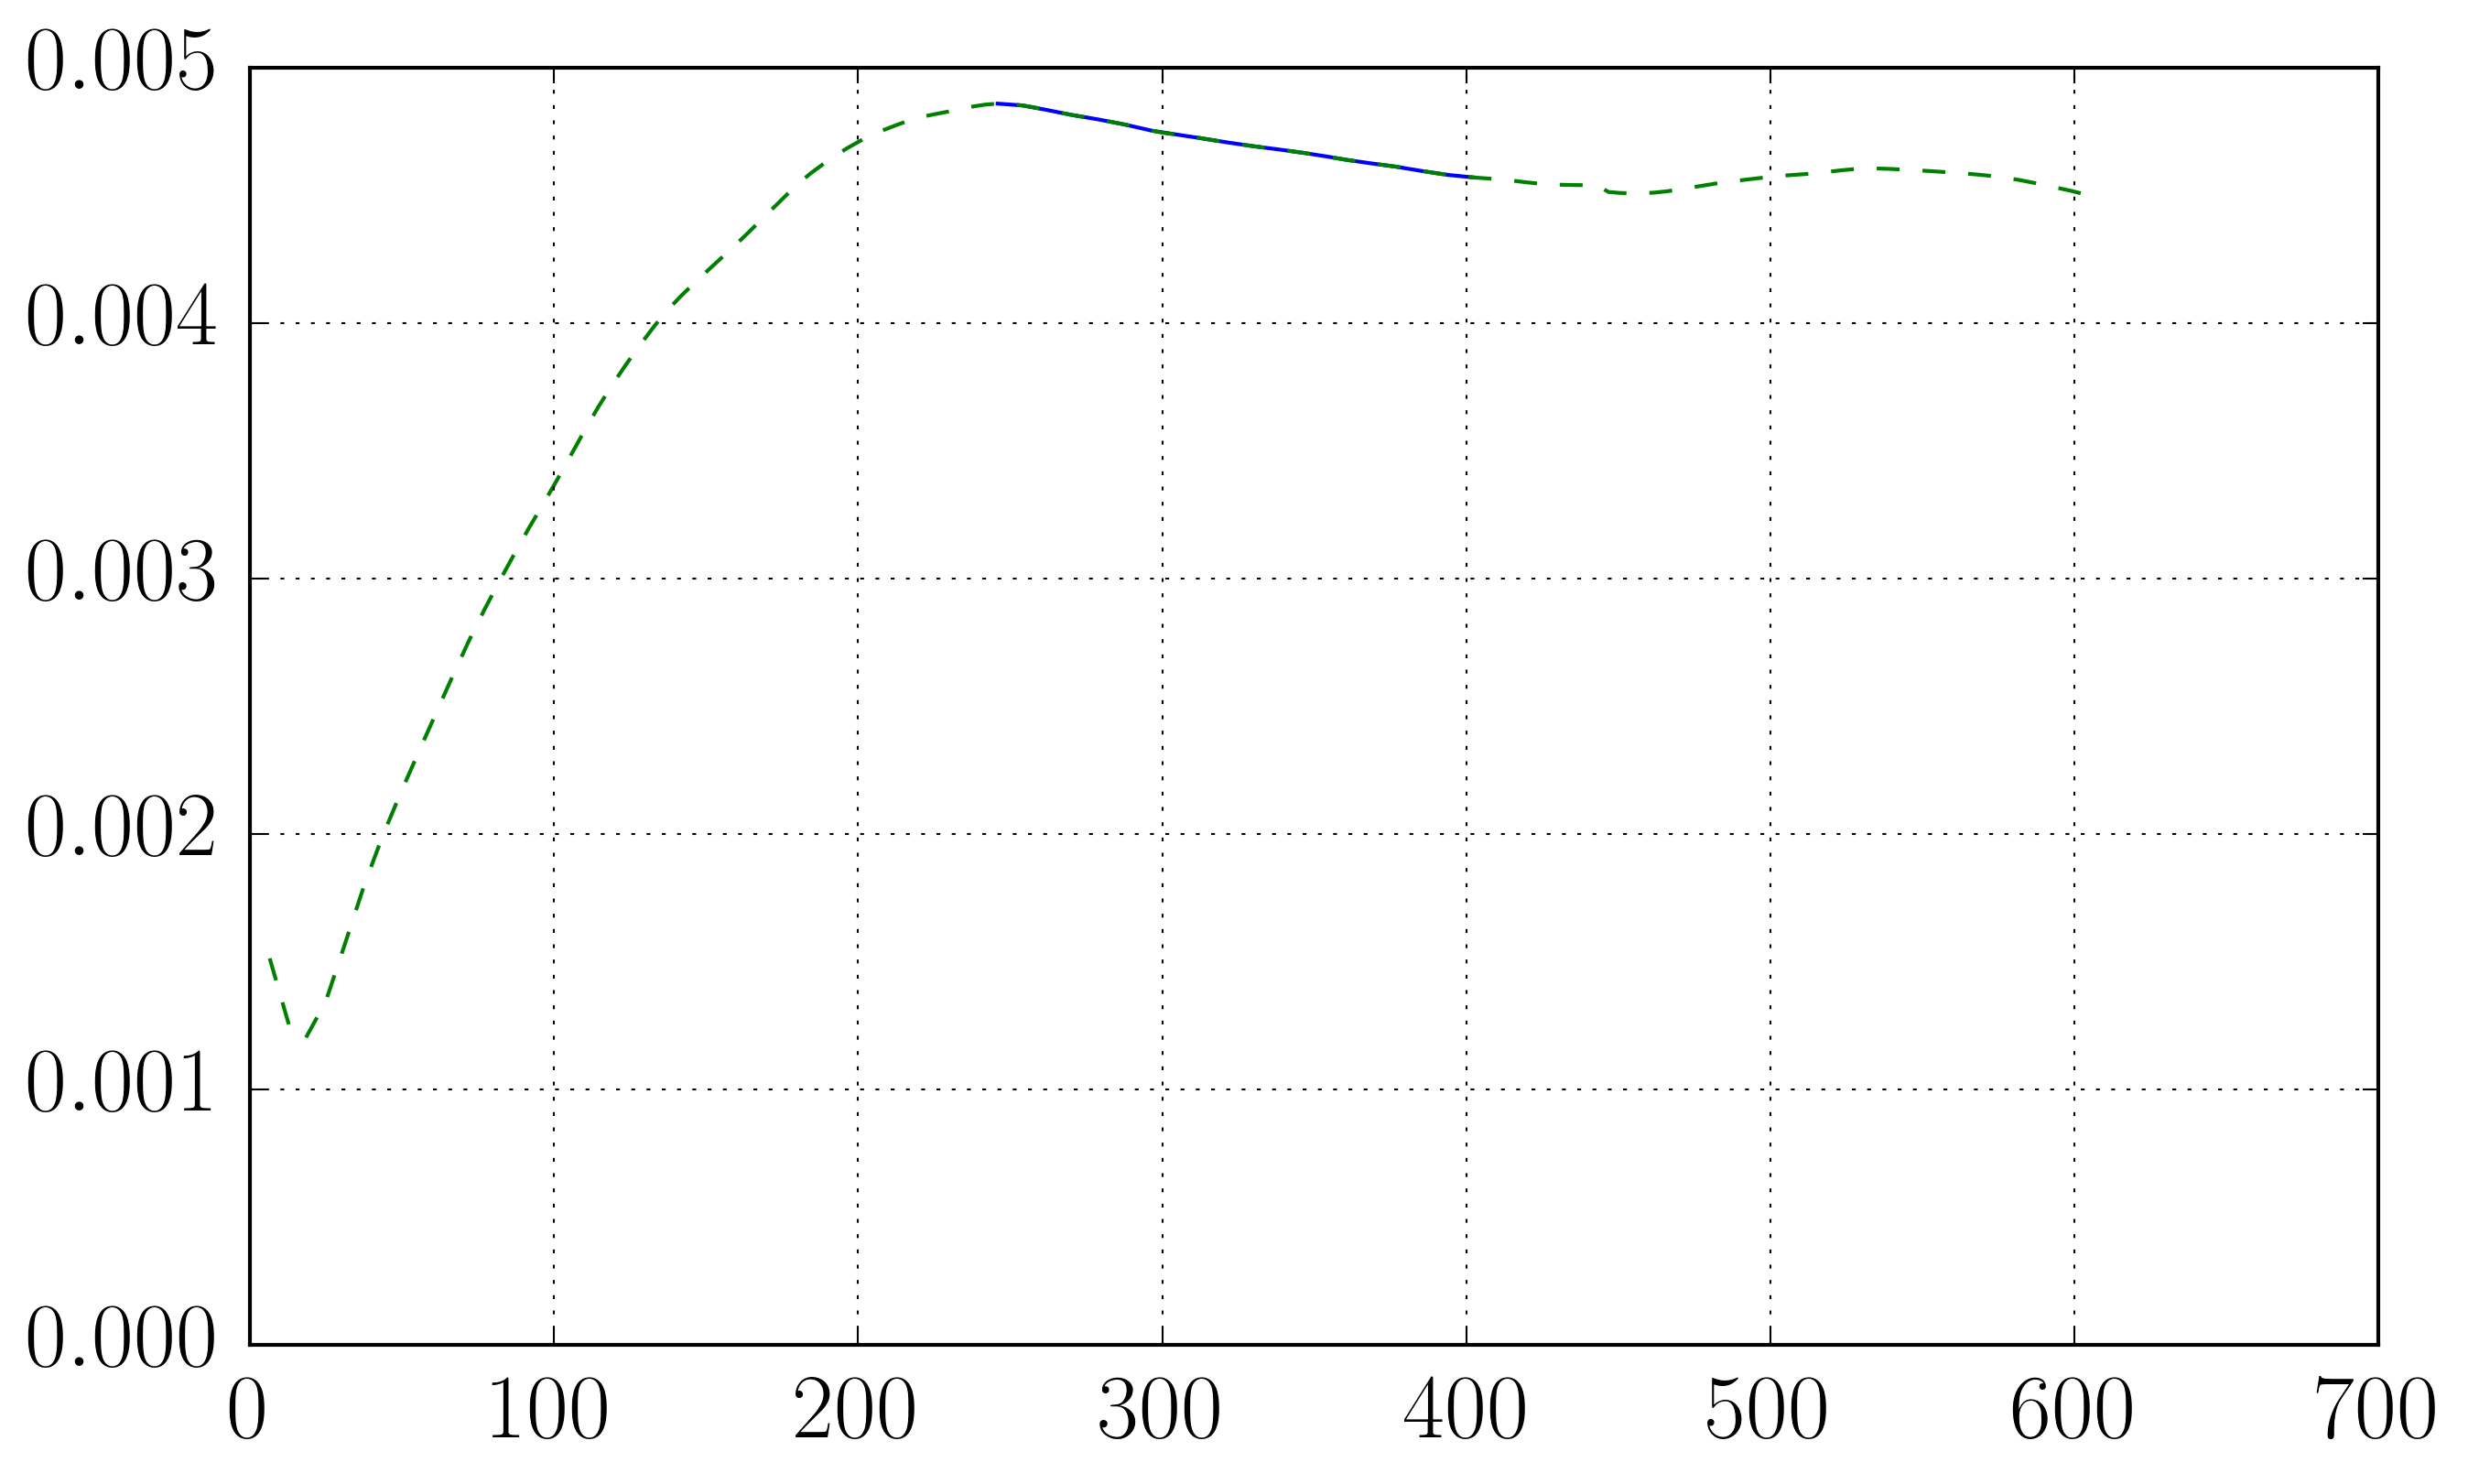

In [10]:
variable = 'EPS'
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
plt.plot(stats['time'],stats['EPS'])
plt.plot(statsf['time'],statsf['EPS'],ls='dashed')
plt.grid('on')
plt.ylim([0,0.005])


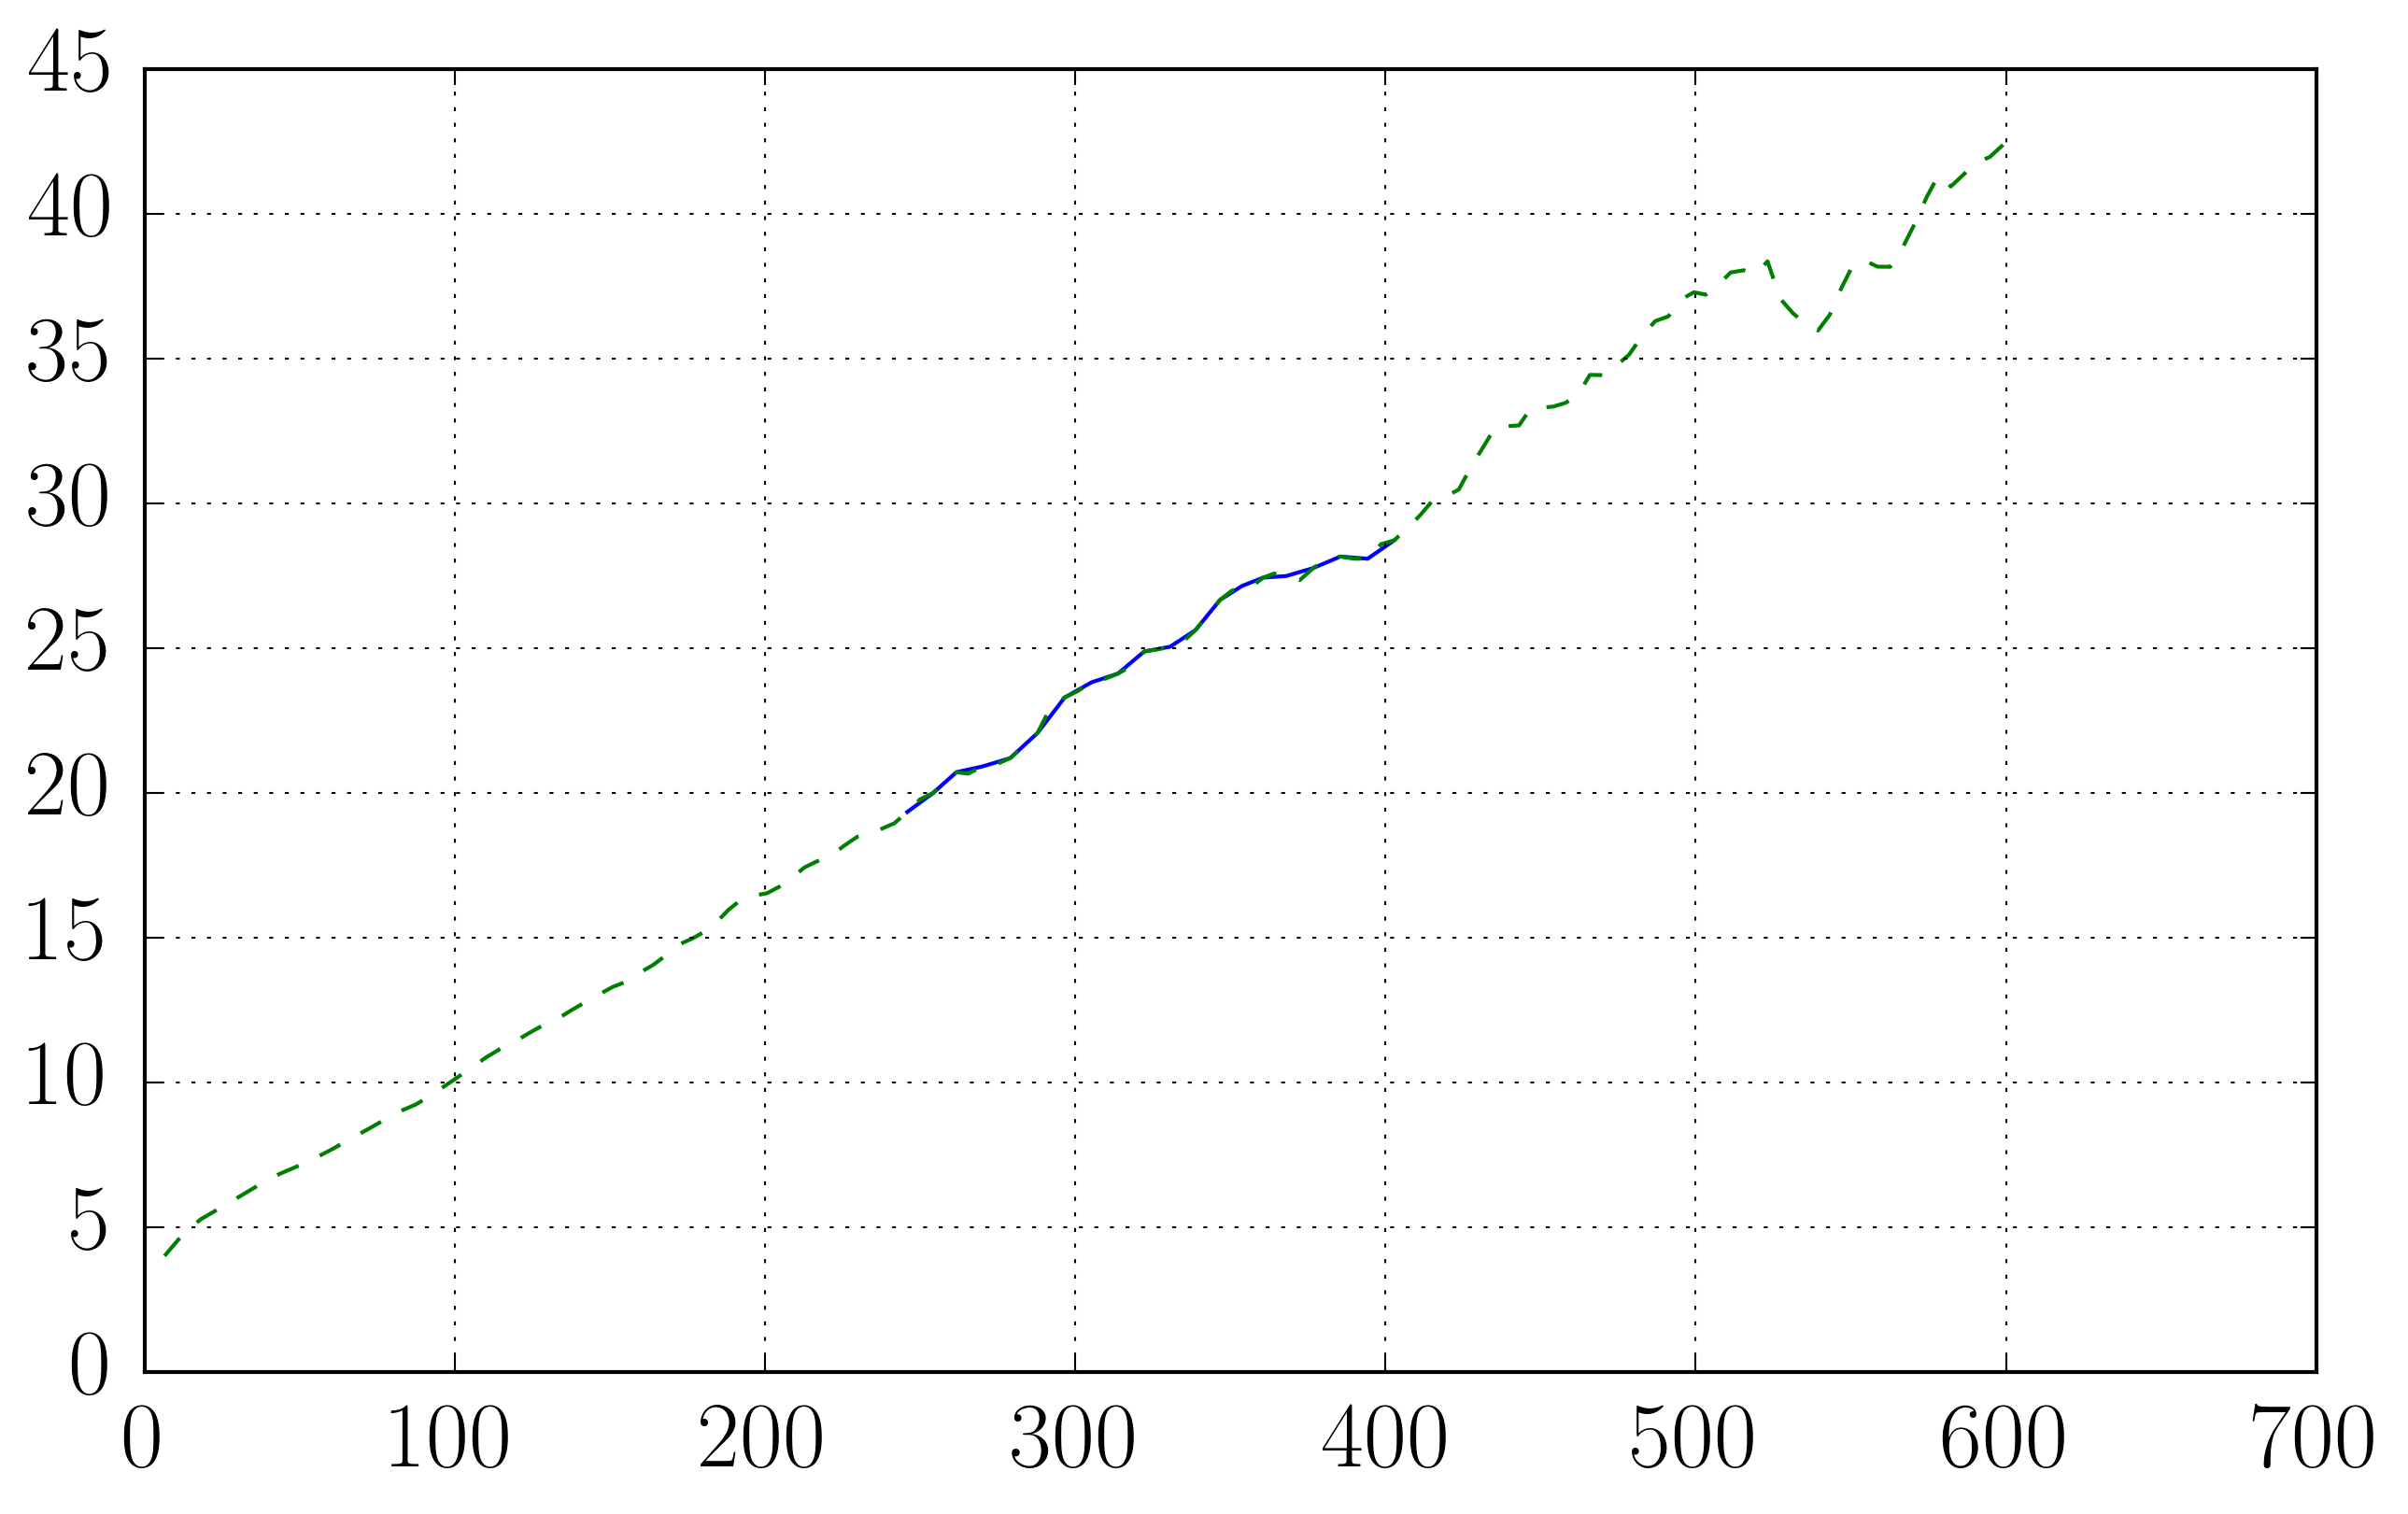

In [11]:
variable = 'dw'
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
plt.plot(stats['time'],stats[variable])
plt.plot(statsf['time'],statsf[variable],ls='dashed')
plt.grid('on')
#plt.ylim([0,0.005])


In [12]:
from scipy.io import FortranFile
#f = FortranFile('pcp.bin', 'r')
#a = f.read_reals(dtype=float)

In [13]:
-
#x = np.fromfile(f, dtype=np.int)  # read the data into numpy


In [14]:
p_fieldt1 = ['/home/toni/fields/s10b_006.upxz','/home/toni/fields/s10b_006.vpxz','/home/toni/fields/s10b_006.wpxz']#,'/home/toni/fields/s10b_006.Tfxz'] #starting SS
p_fieldt2 = ['/home/toni/fields/s10b_007.upxz','/home/toni/fields/s10b_007.vpxz','/home/toni/fields/s10b_007.wpxz']#,'/home/toni/fields/s10b_007.Tfxz'] #starting SS
p_fieldt3 = ['/home/toni/fields/s10b_008.upxz','/home/toni/fields/s10b_008.vpxz','/home/toni/fields/s10b_008.wpxz']#,'/home/toni/fields/s10b_008.Tfxz'] #starting SS

In [22]:
data={}#dictionary
wk = 0
v_variables = ['u','v','w']#,'scal']
firsttime = True
for path,var in zip(p_fieldt2,v_variables):
    time,x,vy,z,wk,Re = read3planes(path)
    data[var] = np.array(wk[:,1,:]) #Mid plane is the one we want
    if var != 'scal':
        data['d'+var+'dz'] = (wk[:,2,:]-wk[:,0,:])/(2*np.diff(z)[1])
    if firsttime == True:
        data['time'] = time
        data['x']  = x
        data['y']  = vy
        data['z']  = z
        data['Re'] = Re
        firsttime  = False

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


[ 0.013635] [ 0.036361]
[ 0.013635] [ 0.036361]
[ 0.013635] [ 0.036361]


In [25]:
print time

322.312


In [26]:
import scipy.io as sio
sio.savemat('/home/toni/fields/MLSS2.mat',data)


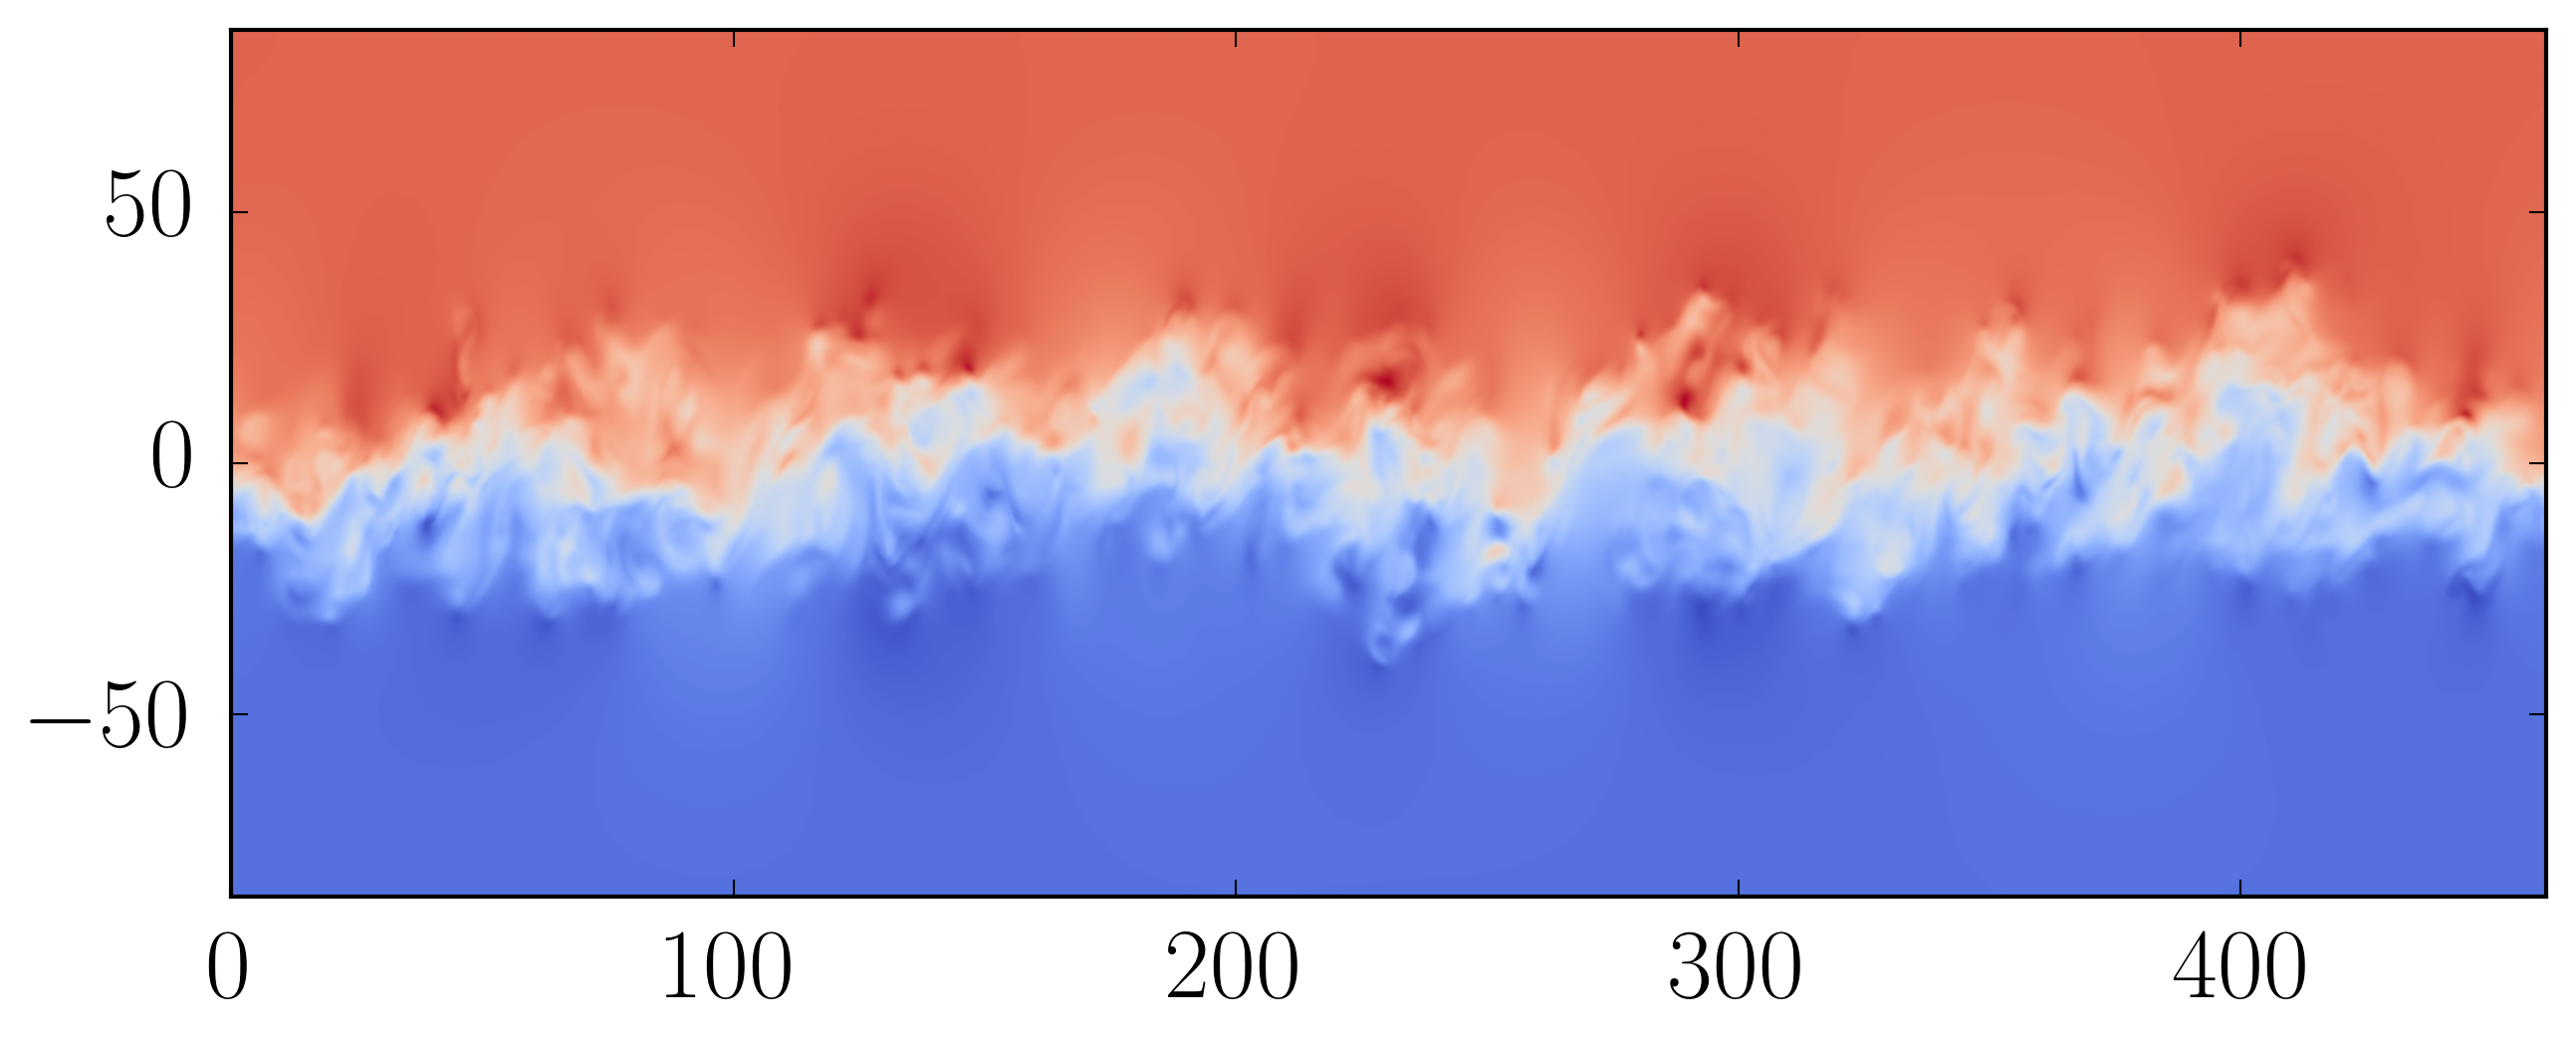

In [27]:
from matplotlib import cm
x = data['x']
y = data['y']
fig, ax = plt.subplots()
cax = plt.imshow(data['u'],extent=(x.min(), x.max(), y.min(), y.max()),interpolation='bicubic',cmap=cm.coolwarm)
#plt.axes().set_aspect('equal', 'datalim')
#plt.axes().set_ylim([-50,50])
#cbar = fig.colorbar(cax, ticks=[-0.5, 0, 0.5])
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

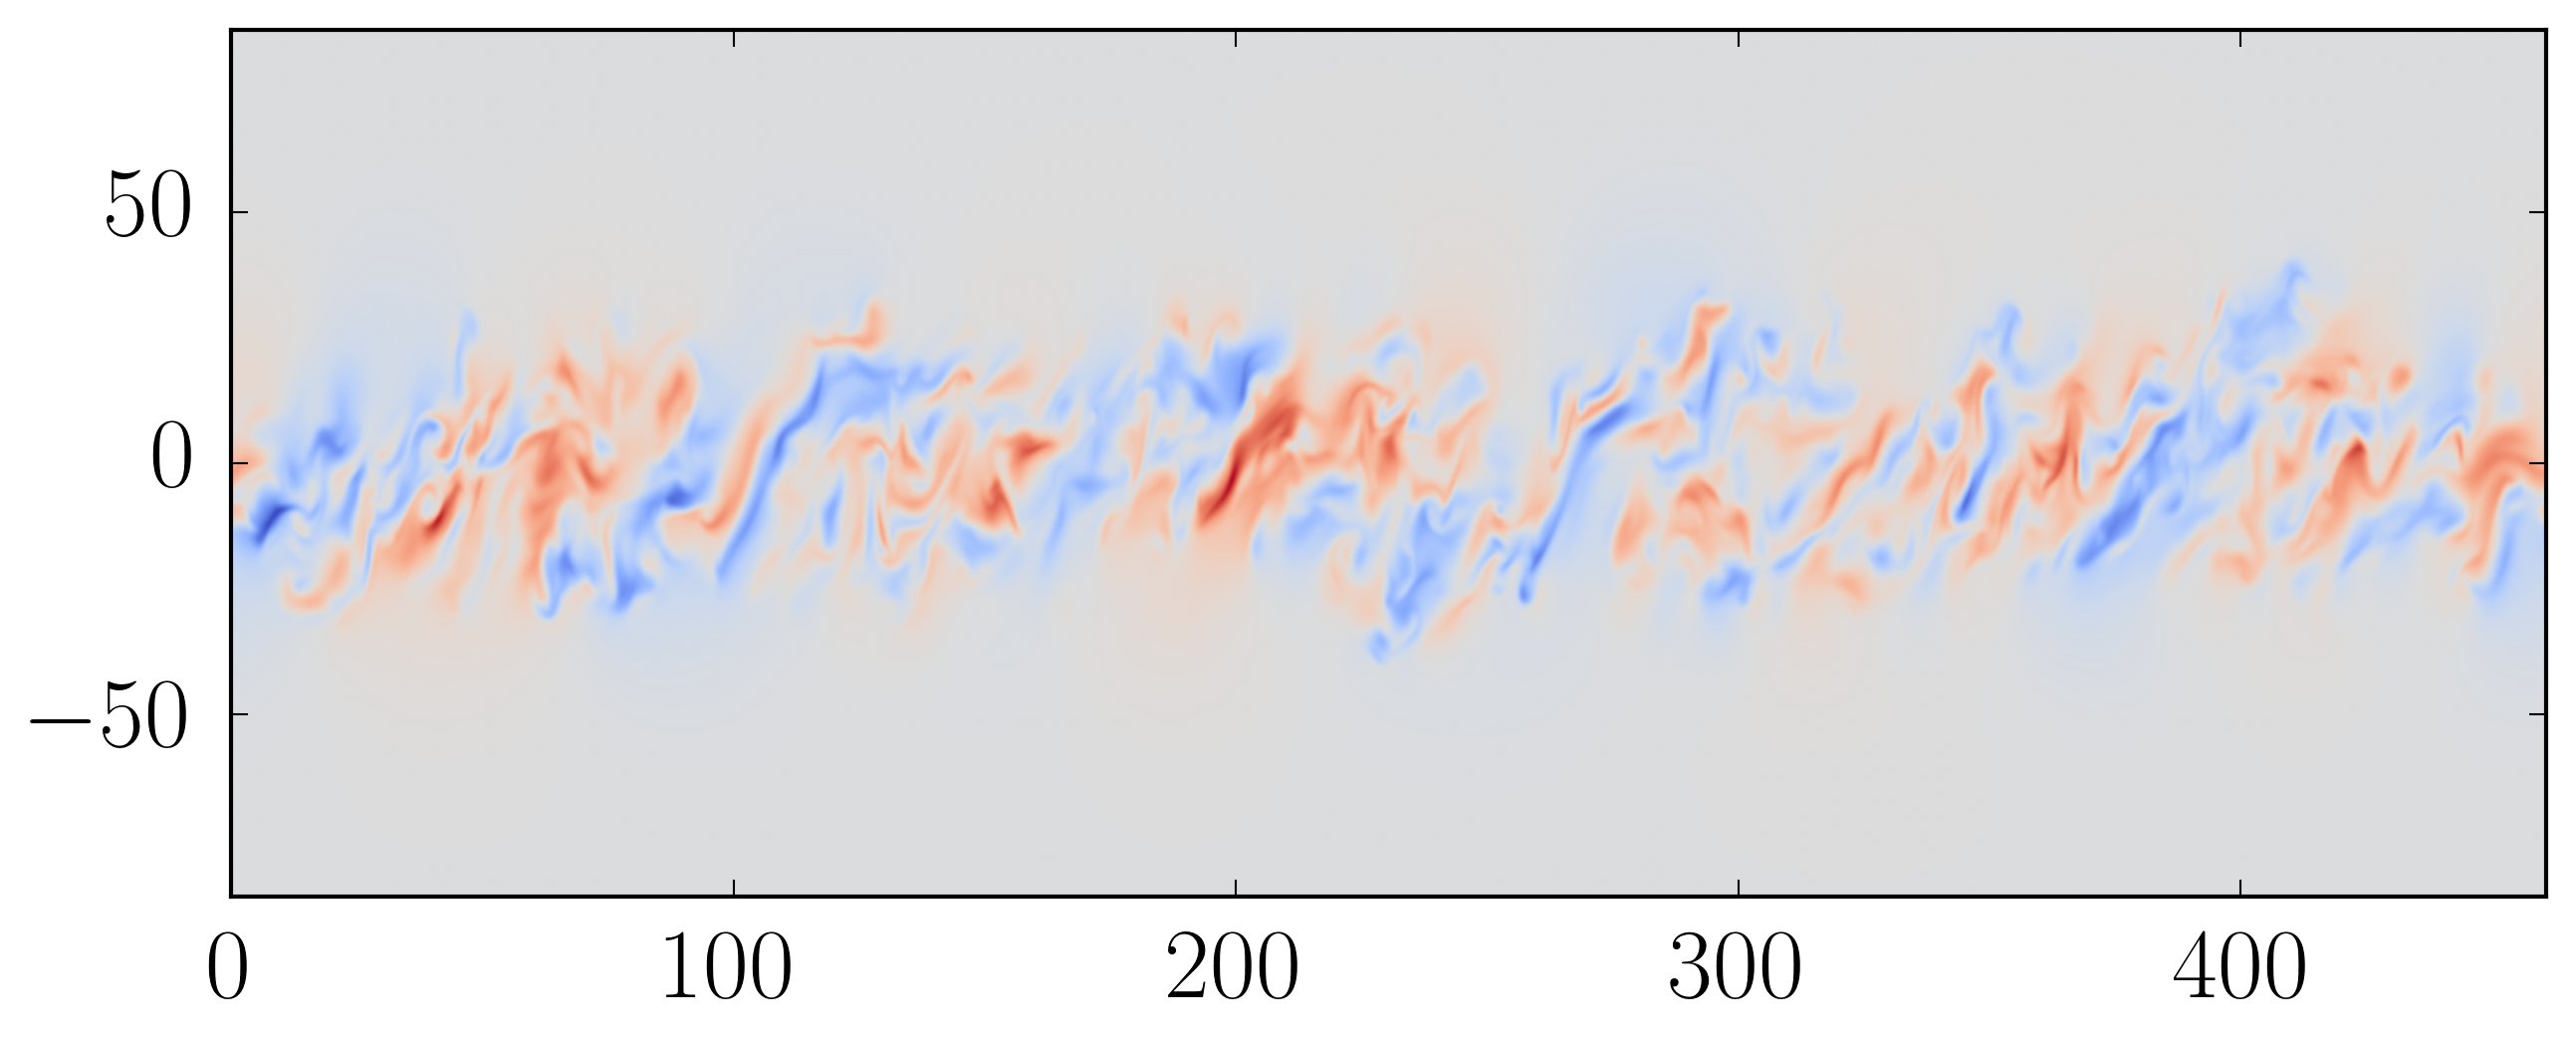

In [28]:
from matplotlib import cm
x = data['x']
y = data['y']
fig, ax = plt.subplots()
cax = plt.imshow(data['w'],extent=(x.min(), x.max(), y.min(), y.max()),interpolation='bicubic',cmap=cm.coolwarm)
#plt.axes().set_aspect('equal', 'datalim')
#plt.axes().set_ylim([-50,50])
#cbar = fig.colorbar(cax, ticks=[-0.5, 0, 0.5])
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar